In [25]:
import pandas as pd

In [43]:
df = pd.read_csv('yelp.csv')
df.dropna()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


In [44]:
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import nltk
#nltk.download('punkt')
tokenizer = RegexpTokenizer(r'\w+')
ps = PorterStemmer()

temp = []
stopWords = ['a', 'the', 'is', 'are', '\n', "'s"]
del newDF
newDF = pd.DataFrame(columns = ['Review','Rating'])


for idx, row in df.iterrows():
    rating = row['stars']
    rev = row['text']
    rev = tokenizer.tokenize(rev)
    for word in rev:
        if word.lower() not in stopWords:
            if word == "'t":
                temp.append('not')
            elif word == "'m":
                temp.append('am')
            else:
                temp.append(ps.stem(word))
    new_data = pd.DataFrame({'Review': [temp], 'Rating': [rating]})
    #print(new_data)
    newDF = pd.concat([newDF, new_data], axis=0)
    #newDF = pd.concat({'Review':temp,'Rating':rating},ignore_index=True)
    temp = []
# In the forum of an array [[sent1], [sent2], ...] -> sentences are separated into words ['word1', 'word2', ...]

In [56]:
# Structure of newDF => Review | Rating
#print(newDF['Review'][:5])
vocab = {}
idx = 1
maxlen = 0
for seq in newDF['Review']:
    maxlen = max(len(seq),maxlen)
    for word in seq:
        if word not in vocab:
            vocab[word] = idx
            idx+=1
print(vocab)
print(maxlen)

{'my': 1, 'wife': 2, 'took': 3, 'me': 4, 'here': 5, 'on': 6, 'birthday': 7, 'for': 8, 'breakfast': 9, 'and': 10, 'it': 11, 'wa': 12, 'excel': 13, 'weather': 14, 'perfect': 15, 'which': 16, 'made': 17, 'sit': 18, 'outsid': 19, 'overlook': 20, 'their': 21, 'ground': 22, 'an': 23, 'absolut': 24, 'pleasur': 25, 'our': 26, 'waitress': 27, 'food': 28, 'arriv': 29, 'quickli': 30, 'semi': 31, 'busi': 32, 'saturday': 33, 'morn': 34, 'look': 35, 'like': 36, 'place': 37, 'fill': 38, 'up': 39, 'pretti': 40, 'so': 41, 'earlier': 42, 'you': 43, 'get': 44, 'better': 45, 'do': 46, 'yourself': 47, 'favor': 48, 'bloodi': 49, 'mari': 50, 'phenomen': 51, 'simpli': 52, 'best': 53, 'i': 54, 've': 55, 'ever': 56, 'had': 57, 'm': 58, 'sure': 59, 'they': 60, 'onli': 61, 'use': 62, 'ingredi': 63, 'from': 64, 'garden': 65, 'blend': 66, 'them': 67, 'fresh': 68, 'when': 69, 'order': 70, 'amaz': 71, 'while': 72, 'everyth': 73, 'menu': 74, 'white': 75, 'truffl': 76, 'scrambl': 77, 'egg': 78, 'veget': 79, 'skillet': 

In [57]:
import numpy as np
import time
#print(len(newDF))
EncodedInput = np.zeros((len(newDF),maxlen), dtype = 'int32')
rowIdx = 0
colIdx = 0
for seq in newDF['Review']:
    for word in seq:
        EncodedInput[colIdx,rowIdx] = vocab[word]
        rowIdx += 1
    rowIdx = 0
    colIdx += 1
# word coded arr in row and col per review

In [58]:
RatingOutput = np.zeros((len(newDF),1), dtype = 'int8')
idx = 0
for rating in newDF['Rating']:
    RatingOutput[idx,0] = rating
    idx+=1
# 1 col of ratings, 1 elemnt per row

In [59]:
from gensim.models import Word2Vec
corpus = newDF['Review']
# Initialize and train Word2Vec model
model = Word2Vec(sentences=corpus, window=10, min_count=5, vector_size=10)
model.train(corpus, total_examples=len(corpus), epochs=10)

# Access trained word embeddings
embeddings = model.wv

In [60]:
embeddings.most_similar(positive=['good','quick','nice','delic'], negative=['bad','rude'])

[('killer', 0.8936238884925842),
 ('awesom', 0.8894967436790466),
 ('nosh', 0.870161771774292),
 ('yummi', 0.8627320528030396),
 ('refresh', 0.859990119934082),
 ('perfect', 0.8559157252311707),
 ('superb', 0.8533614277839661),
 ('amazingli', 0.8305032253265381),
 ('grub', 0.8304874897003174),
 ('delici', 0.8195342421531677)]

In [61]:
embVec = model.wv.vectors

KMeans(n_clusters=5, n_init=10, random_state=42)
and: Cluster 0
i: Cluster 0
to: Cluster 0
it: Cluster 0
of: Cluster 0
wa: Cluster 0
for: Cluster 0
in: Cluster 0
that: Cluster 0
you: Cluster 0
my: Cluster 0
with: Cluster 1
but: Cluster 0
thi: Cluster 0
they: Cluster 0
s: Cluster 3
on: Cluster 0
we: Cluster 0
have: Cluster 0
t: Cluster 0
not: Cluster 0
place: Cluster 0
had: Cluster 0
good: Cluster 0
so: Cluster 0
be: Cluster 0
at: Cluster 0
food: Cluster 0
were: Cluster 0
as: Cluster 0
like: Cluster 0
there: Cluster 0
great: Cluster 0
go: Cluster 0
if: Cluster 0
all: Cluster 0
get: Cluster 0
me: Cluster 0
time: Cluster 0
out: Cluster 0
just: Cluster 0
here: Cluster 0
veri: Cluster 0
one: Cluster 0
can: Cluster 0
or: Cluster 0
their: Cluster 0
order: Cluster 0
from: Cluster 0
up: Cluster 0
when: Cluster 0
our: Cluster 0
realli: Cluster 0
about: Cluster 0
some: Cluster 0
servic: Cluster 0
would: Cluster 0
what: Cluster 0
love: Cluster 0
an: Cluster 0
been: Cluster 0
tri: Cluster 0
your: C

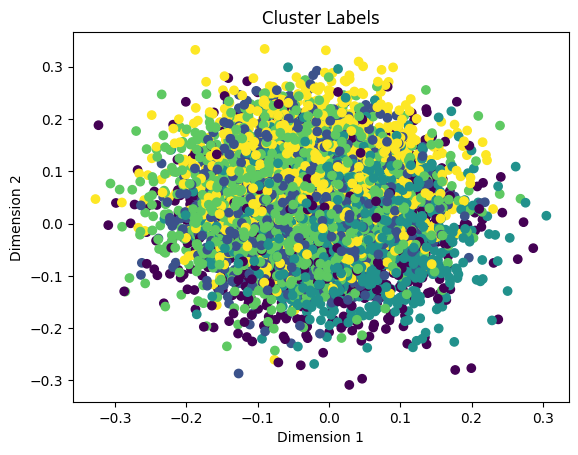

In [71]:
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
import numpy as np

import warnings
# warnings.filterwarnings("ignore")

model = Word2Vec.load("EmbeddingsModel")
# Retrieve word embeddings
embeddings = model.wv.vectors
embeddings = np.array(embeddings)

#Apply K-means clustering
num_clusters = 5  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)

import os
os.environ["OMP_NUM_THREADS"] = "1"

warnings.filterwarnings("ignore", category=FutureWarning)

normalized_embeddings = np.linalg.norm(embeddings, axis=1, keepdims=True)
normalized_embeddings = embeddings / normalized_embeddings
# print(normalized_embeddings.shape)
# print(model.vector_size)
# print(np.isnan(normalized_embeddings).any())
print(kmeans)
cluster_labels = kmeans.fit_predict(normalized_embeddings)
words = model.wv.index_to_key
for word, label in zip(words, cluster_labels):
    print(f"{word}: Cluster {label}")

import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(normalized_embeddings[:, 0], normalized_embeddings[:, 1], c=cluster_labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Cluster Labels')
plt.show()

In [70]:
model.save('EmbeddingsModel')

In [76]:
# print(EncodedInput)
# print(RatingOutput)
# Input in the form of each word has an index in a dict and 
# they are converted to numbers, padded to the length of the longest review
# Output is each row is the value of the review for the given review in its same row
# Len of data set is 10000

X_Train = EncodedInput[:9000]
Y_Train = RatingOutput[:9000]
X_Test = EncodedInput[9000:]
Y_Test = RatingOutput[9000:]

[[   1    2    3 ...    0    0    0]
 [  54  100  101 ...    0    0    0]
 [ 206  207  208 ...    0    0    0]
 ...
 [  54 1166 2321 ...    0    0    0]
 [   1 9695  273 ...    0    0    0]
 [ 609  128  243 ...    0    0    0]]
[[5]
 [5]
 [4]
 ...
 [4]
 [2]
 [5]]
1000
9000
